# Initial Setup
 This section handles the import of necessary libraries and configuration of the environment.
 We add a specific path to the system path list to include custom modules from the project directory.



In [29]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.getenv('PYTHONPATH'))

# Ahora puedes realizar las importaciones
from model.config.config_loader import config
from model.core.dataPreprocessing.dataCleaner import DataCleaner
from model.core.dataPreprocessing.featureExtraction import FeatureSelector
from model.core.dataPreprocessing.featureVisualizer import FeatureVisualizer
from model.utils.dataExtractor import DataExtractor
from model.utils.dataVisualization import DataVisualization
import pandas as pd
import numpy as np


data_analyzer = DataVisualization()

folder path guide:

In [30]:
base_path = '../../../data'

#transforming the data csv wrong to a correct csv
original_data = config['paths']['original_data'].format(base_path=base_path)

#cleaning the data and features
all_features_file = config['paths']['all_features_file'].format(base_path=base_path)
sfs_features_file = config['paths']['sfs_features_file'].format(base_path=base_path)

#encoding and normalizing the data to use in the future
encoder_file = config['paths']['encoder_file'].format(base_path=base_path)
normalizer_file = config['paths']['normalizer_file'].format(base_path=base_path)

#final data to use in the model
final_features_file = config['paths']['final_features_file'].format(base_path=base_path)
processed_final_data = config['paths']['processed_final_data'].format(base_path=base_path)




# Data Loading and Initial Processing
 Load raw data, apply preprocessing transformations, and save the processed version.
 This ensures data integrity and consistency for downstream analysis. this is made because of the raw data extrated from the csv

In [31]:
# Extraccion de base de datos
data = DataExtractor.load_data_txt_to_dataframe(original_data)
print(data)
print(data_analyzer.describe_data(data=data))
DataExtractor.save_array_to_txt(data.columns, all_features_file)

C:\TyT_carolina\model\utils\dataExtractor.py:100: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, delimiter=delimiter, encoding=encoding)


       ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                      CC          COLOMBIA           M           06/06/2002   
1                      CC          COLOMBIA           M           20/10/1998   
2                      CC          COLOMBIA           M           05/08/1992   
3                      CC          COLOMBIA           F           21/01/2003   
4                      CC          COLOMBIA           F           23/03/2003   
...                   ...               ...         ...                  ...   
102991                 CC          COLOMBIA           F           01/04/2003   
102992                 CC          COLOMBIA           F           17/02/2003   
102993                 CC          COLOMBIA           F           12/07/1983   
102994                 CC          COLOMBIA           F           28/01/1999   
102995                 CC          COLOMBIA           F           24/08/1999   

       ESTU_EXTERIOR  PERIODO ESTU_CONS

# Feature Filtering and Organization
 Features are categorized into selected and discarded groups based on domain knowledge.
 This aids in focusing the analysis on relevant features and excluding non-informative ones by hand.


In [32]:

initial_features_descarted =[]

initial_features_selected=[
"ESTU_TIPODOCUMENTO","ESTU_NACIONALIDAD","ESTU_GENERO","ESTU_FECHANACIMIENTO","ESTU_EXTERIOR","PERIODO","ESTU_CONSECUTIVO","ESTU_ESTUDIANTE","ESTU_PAIS_RESIDE","ESTU_AREARESIDE","ESTU_DEPTO_RESIDE","ESTU_COD_RESIDE_DEPTO","ESTU_MCPIO_RESIDE","ESTU_COD_RESIDE_MCPIO",
"ESTU_ESTADOCIVIL","ESTU_VALORMATRICULAUNIVERSIDAD","ESTU_PAGOMATRICULABECA","ESTU_PAGOMATRICULACREDITO","ESTU_PAGOMATRICULAPADRES","ESTU_PAGOMATRICULAPROPIO","ESTU_CURSODOCENTESIES","ESTU_CURSOIESAPOYOEXTERNO","ESTU_CURSOIESEXTERNA","ESTU_SIMULACROTIPOICFES",
"ESTU_ACTIVIDADREFUERZOAREAS","ESTU_ACTIVIDADREFUERZOGENERIC","ESTU_TIPODOCUMENTOSB11","ESTU_SEMESTRECURSA","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_OCUPACIONPADRE","FAMI_OCUPACIONMADRE","FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET","FAMI_TIENECOMPUTADOR",
"FAMI_TIENELAVADORA","FAMI_TIENEHORNOMICROOGAS","FAMI_TIENESERVICIOTV","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS","FAMI_CUANTOSCOMPARTEBA�O","ESTU_PRESENTACIONCASA","ESTU_HORASSEMANATRABAJA","FAMI_TRABAJOLABORPADRE",
"FAMI_TRABAJOLABORMADRE","INST_COD_INSTITUCION","INST_NOMBRE_INSTITUCION","ESTU_PRGM_ACADEMICO","ESTU_SNIES_PRGMACADEMICO","GRUPOREFERENCIA","ESTU_PRGM_CODMUNICIPIO","ESTU_PRGM_MUNICIPIO","ESTU_PRGM_DEPARTAMENTO","ESTU_NIVEL_PRGM_ACADEMICO","ESTU_METODO_PRGM",
"ESTU_NUCLEO_PREGRADO","ESTU_INST_CODMUNICIPIO","ESTU_INST_MUNICIPIO","ESTU_INST_DEPARTAMENTO","INST_CARACTER_ACADEMICO","INST_ORIGEN","ESTU_CODICFESCOLE_TERMINO","ESTU_COLE_TERMINO","ESTU_CODDANE_COLE_TERMINO","ESTU_COD_COLE_MCPIO_TERMINO",
"ESTU_COD_MCPIO_PRESENTACION","ESTU_MCPIO_PRESENTACION","ESTU_DEPTO_PRESENTACION","ESTU_COD_DEPTO_PRESENTACION","MOD_RAZONA_CUANTITAT_PUNT","MOD_RAZONA_CUANTITATIVO_PNAL","MOD_RAZONA_CUANTITATIVO_PNBC","MOD_LECTURA_CRITICA_PUNT","MOD_LECTURA_CRITICA_PNAL",
"MOD_LECTURA_CRITICA_PNBC","MOD_COMPETEN_CIUDADA_PUNT","MOD_COMPETEN_CIUDADA_PNAL","MOD_COMPETEN_CIUDADA_PNBC","MOD_INGLES_PUNT","MOD_INGLES_DESEM","MOD_INGLES_PNAL","MOD_INGLES_PNBC","MOD_COMUNI_ESCRITA_PUNT","MOD_COMUNI_ESCRITA_DESEM","MOD_COMUNI_ESCRITA_PNAL",
"MOD_COMUNI_ESCRITA_PNBC","PUNT_GLOBAL","PERCENTIL_NBC","PERCENTIL_GLOBAL","ESTU_ESTADOINVESTIGACION","FAMI_CUANTOSCOMPARTEBAÑO"
]

# Función para separar las características en diferentes DataFrames
selected_features = [f for f in  initial_features_selected if f in data.columns]
discarded_features = [f for f in initial_features_descarted if f in data.columns]

selected_df = data[selected_features]
discarded_df = data[discarded_features]

# Determinar las características que sobran
all_features = set(data.columns)
used_features = set(selected_features).union(discarded_features)
remaining_features = list(all_features - used_features)
remaining_df = data[remaining_features]

print("size of selected_df: ", selected_df.shape)
print("size of discarded_df: ", discarded_df.shape)
print("size of remaining_df: ", remaining_df.shape)

print("feature remaining: ", remaining_df.columns)




size of selected_df:  (102996, 91)
size of discarded_df:  (102996, 0)
size of remaining_df:  (102996, 0)
feature remaining:  Index([], dtype='object')


# Data Preparation for Modeling


In [33]:
#count nan coulmns found
print(selected_df)
nan_columns = selected_df.apply(lambda x: x.isnull().sum(), axis=0)
nan_columns = nan_columns[nan_columns > 0]
print(nan_columns)

print(selected_df['ESTU_CURSODOCENTESIES'])

       ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                      CC          COLOMBIA           M           06/06/2002   
1                      CC          COLOMBIA           M           20/10/1998   
2                      CC          COLOMBIA           M           05/08/1992   
3                      CC          COLOMBIA           F           21/01/2003   
4                      CC          COLOMBIA           F           23/03/2003   
...                   ...               ...         ...                  ...   
102991                 CC          COLOMBIA           F           01/04/2003   
102992                 CC          COLOMBIA           F           17/02/2003   
102993                 CC          COLOMBIA           F           12/07/1983   
102994                 CC          COLOMBIA           F           28/01/1999   
102995                 CC          COLOMBIA           F           24/08/1999   

       ESTU_EXTERIOR  PERIODO ESTU_CONS

# Data Cleaning and Enhancement
 Perform data cleaning and enhancement operations including encoding, normalization, and standardization.
 These steps prepare the dataset for more effective model training. 

In [34]:
print(selected_df['ESTU_TIPODOCUMENTO'])

0         CC
1         CC
2         CC
3         CC
4         CC
          ..
102991    CC
102992    CC
102993    CC
102994    CC
102995    CC
Name: ESTU_TIPODOCUMENTO, Length: 102996, dtype: object


In [35]:
# Ejemplo de uso
# Supongamos que 'df' es tu DataFrame original
df = selected_df.copy()

# Crear una instancia de DataCleaner
cleaner = DataCleaner(X=df)
cleaner.convert_int_to_float()

# codificar las variables categóricas
df_encoded, encoder = cleaner.apply_encoding(encoding_method='label') 

#convertir las variables categóricas a dummies
#cleaner.normalize_numeric_data()
#cleaner.reverse_normalize()

#df_decoded = cleaner.reverse_encoding(encoding_method='label')




clean_data = cleaner.X
print(clean_data.head())
print(DataVisualization.describe_data(clean_data)) 
# Imprimir los primeros datos limpios

   ESTU_TIPODOCUMENTO  ESTU_NACIONALIDAD  ESTU_GENERO  ESTU_FECHANACIMIENTO  \
0                   0                  4            1                  2144   
1                   0                  4            1                  7782   
2                   0                  4            1                  1807   
3                   0                  4            0                  7882   
4                   0                  4            0                  8742   

   ESTU_EXTERIOR  PERIODO  ESTU_CONSECUTIVO  ESTU_ESTUDIANTE  \
0              0  20221.0             48251                0   
1              0  20221.0             55177                0   
2              0  20221.0              8520                0   
3              0  20221.0               924                0   
4              0  20221.0              6331                0   

   ESTU_PAIS_RESIDE  ESTU_AREARESIDE  ...  MOD_INGLES_PNBC  \
0                 4                1  ...             92.0   
1               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102996 entries, 0 to 102995
Data columns (total 91 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ESTU_TIPODOCUMENTO              102996 non-null  int64  
 1   ESTU_NACIONALIDAD               102996 non-null  int64  
 2   ESTU_GENERO                     102996 non-null  int64  
 3   ESTU_FECHANACIMIENTO            102996 non-null  int64  
 4   ESTU_EXTERIOR                   102996 non-null  int64  
 5   PERIODO                         102996 non-null  float64
 6   ESTU_CONSECUTIVO                102996 non-null  int64  
 7   ESTU_ESTUDIANTE                 102996 non-null  int64  
 8   ESTU_PAIS_RESIDE                102996 non-null  int64  
 9   ESTU_AREARESIDE                 102996 non-null  int64  
 10  ESTU_DEPTO_RESIDE               102996 non-null  int64  
 11  ESTU_COD_RESIDE_DEPTO           102832 non-null  float64
 12  ESTU_MCPIO_RESID

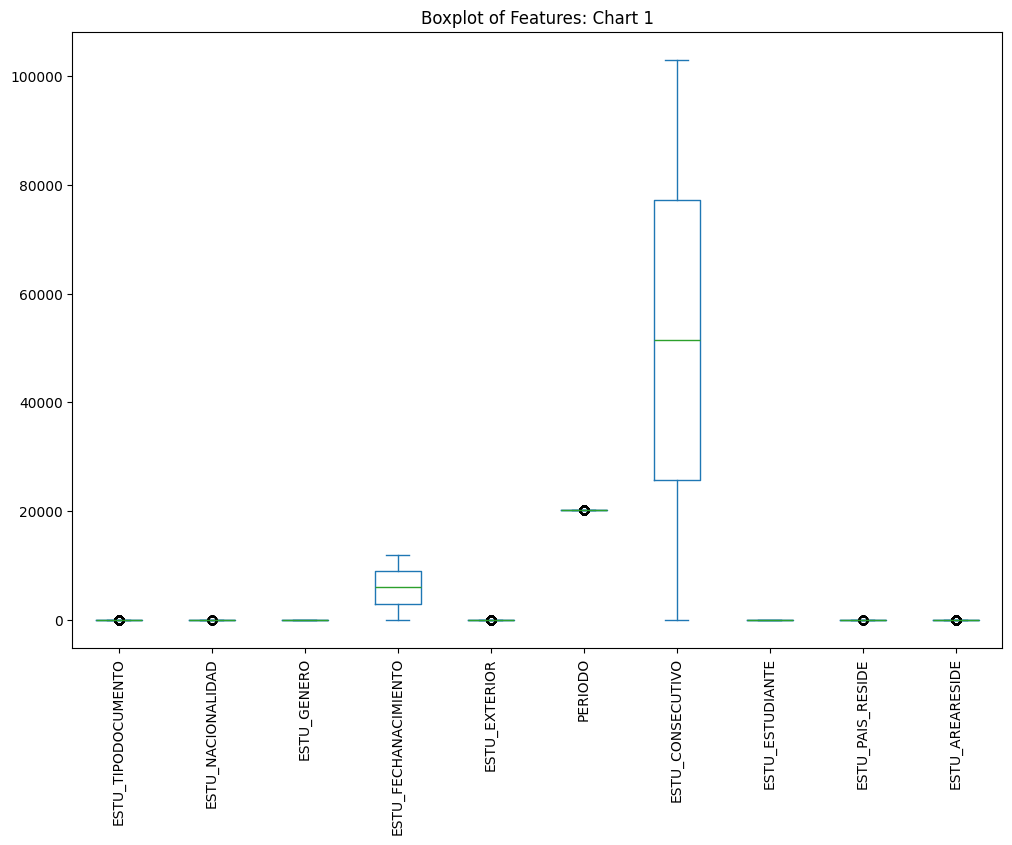

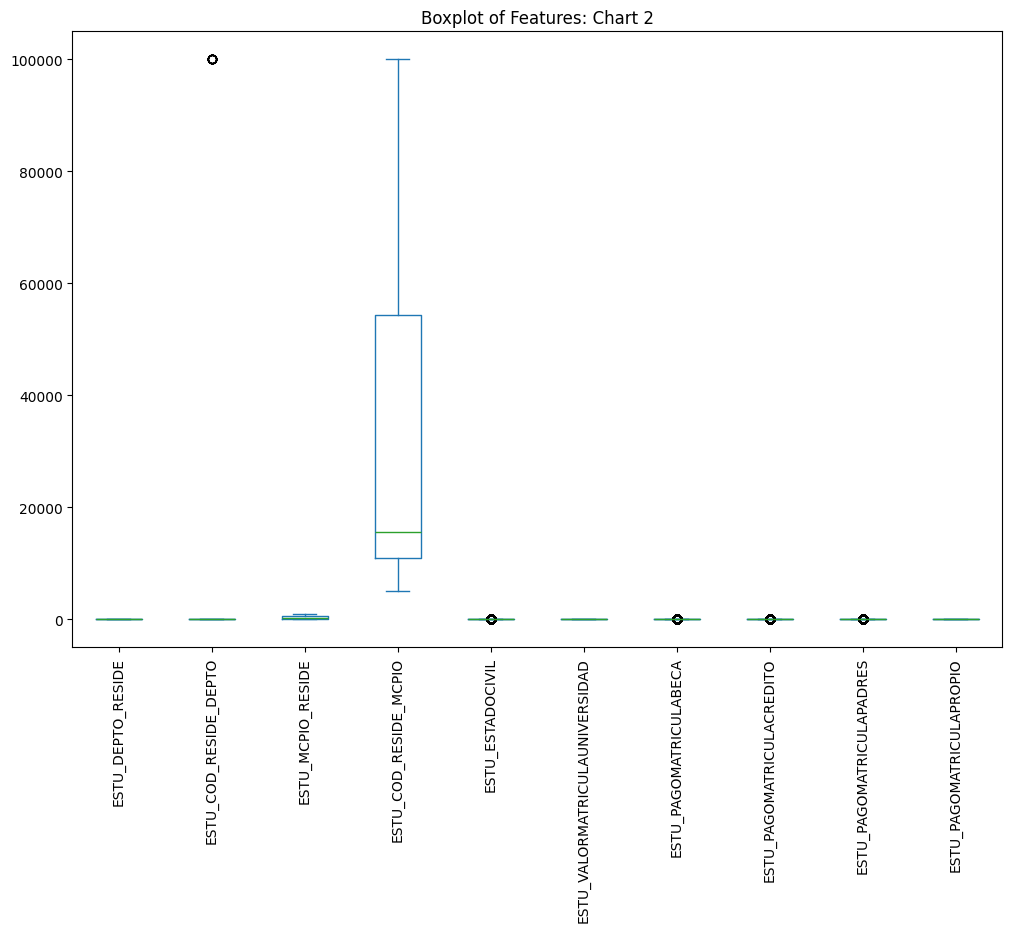

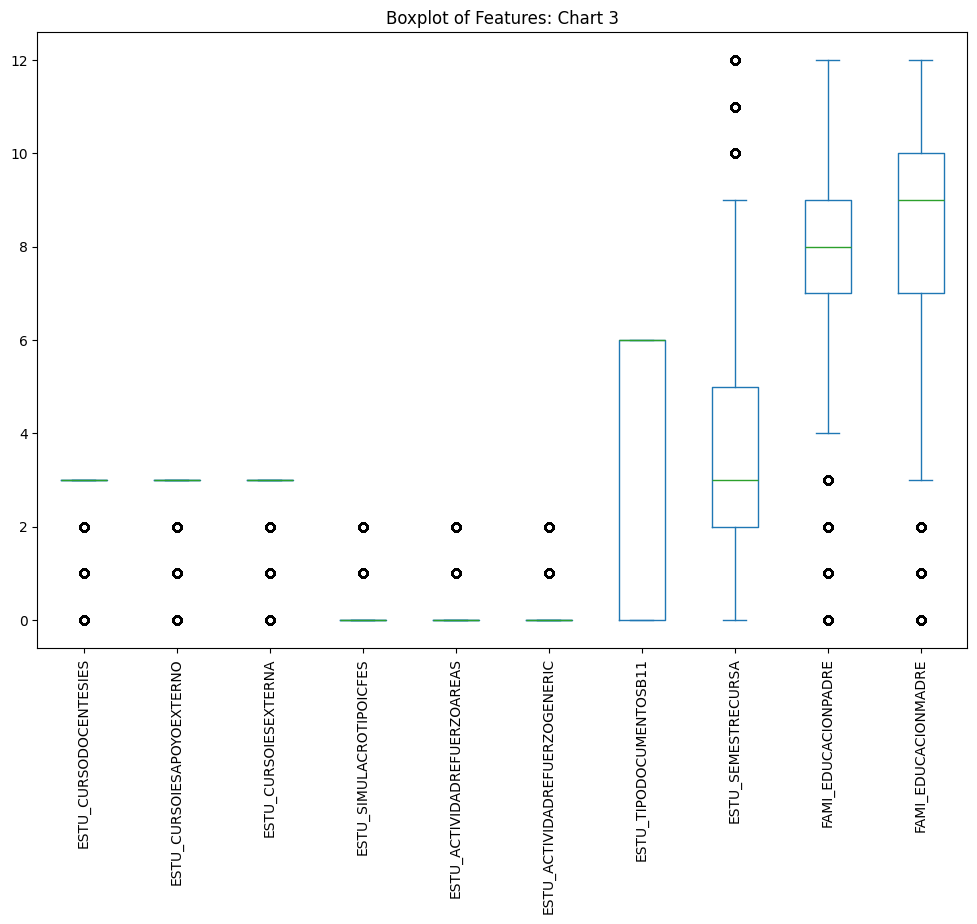

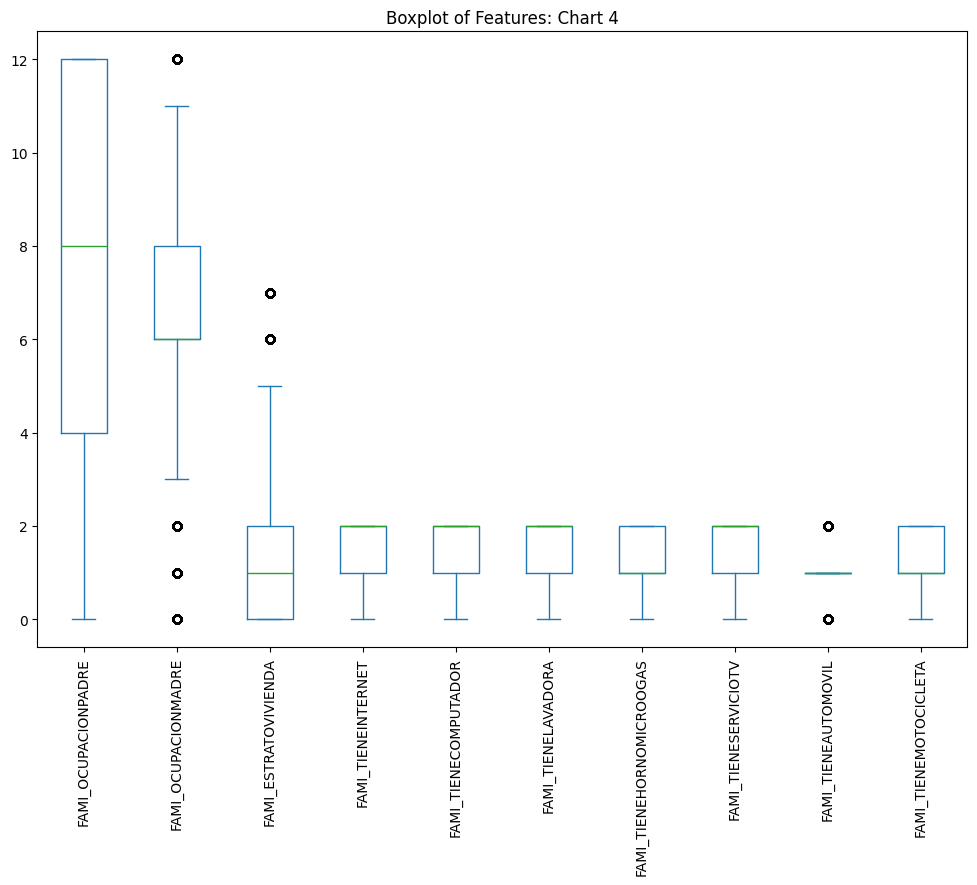

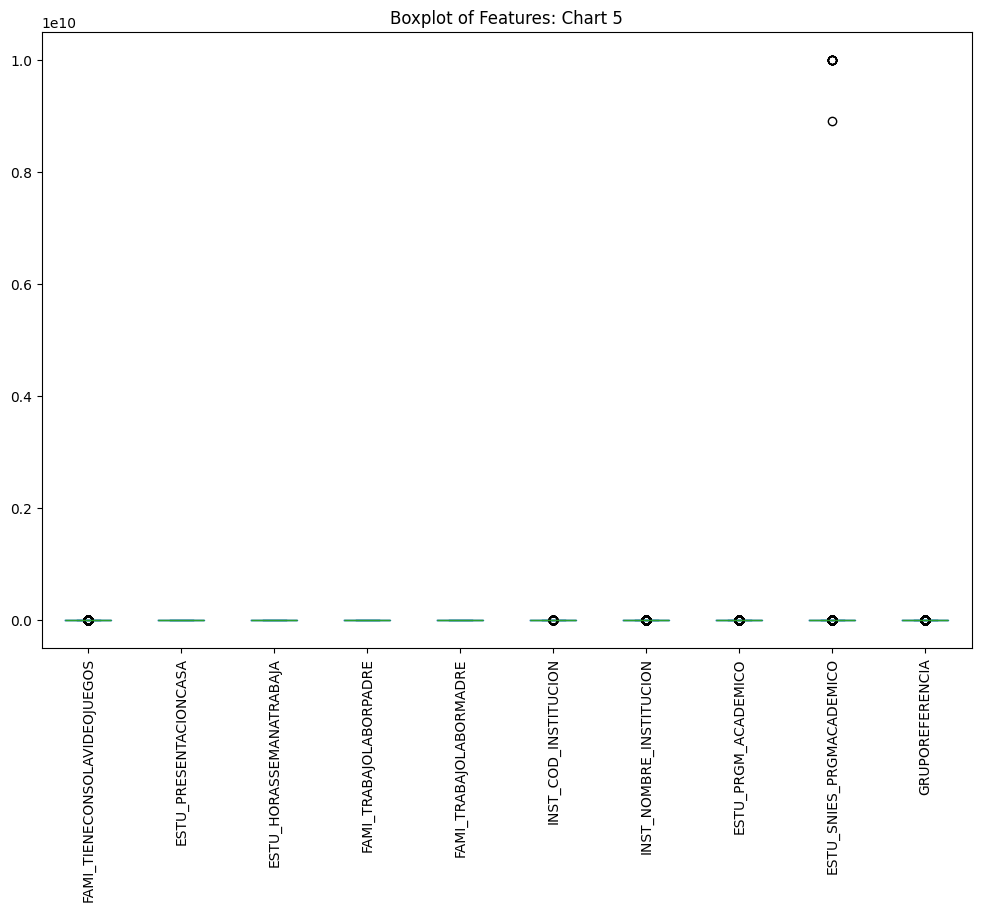

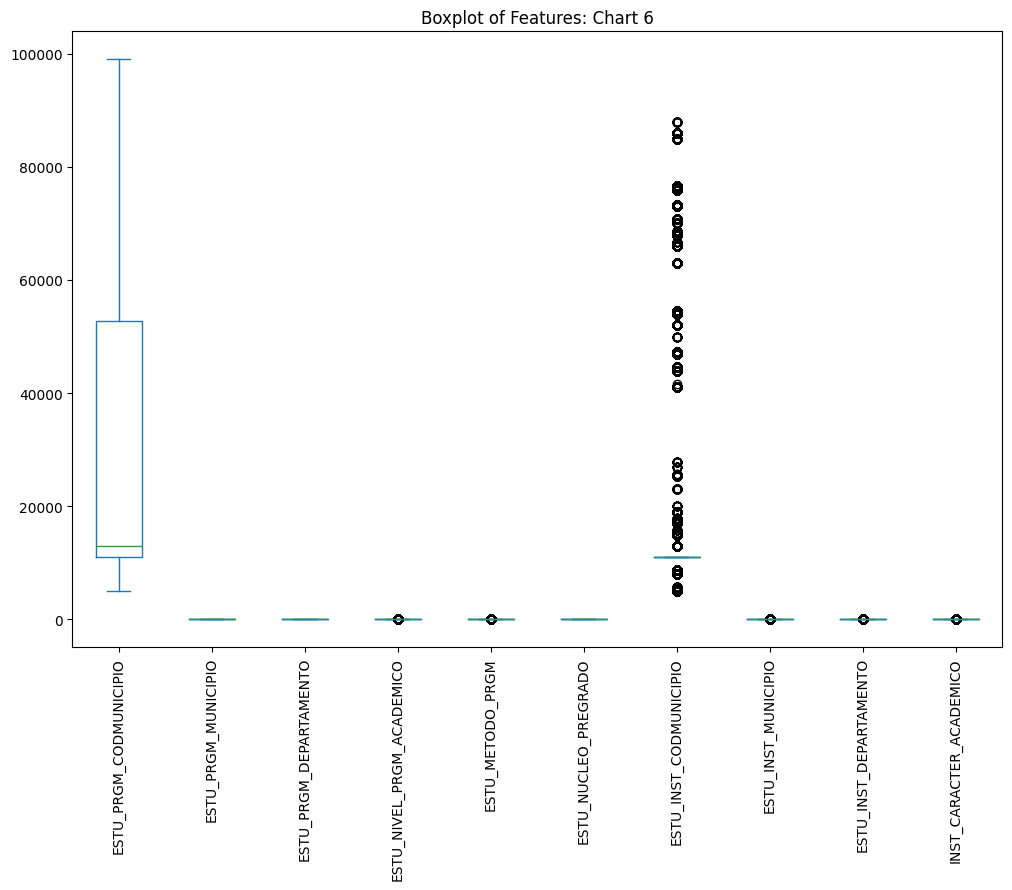

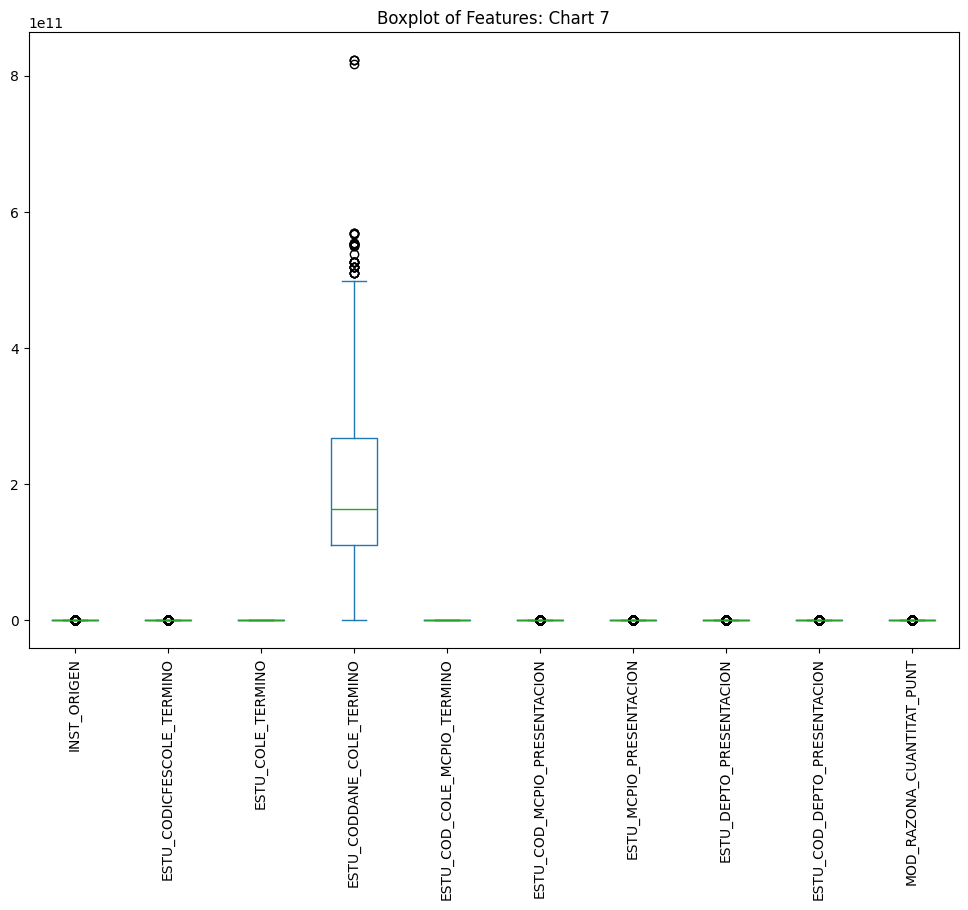

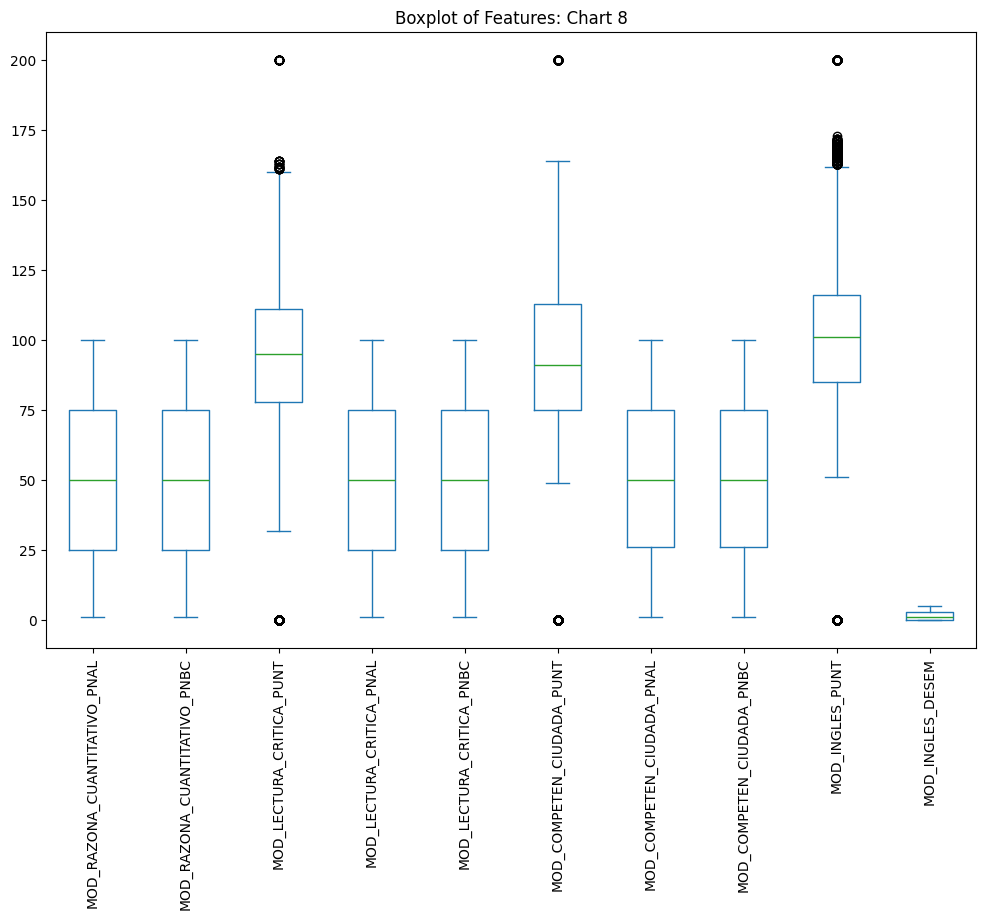

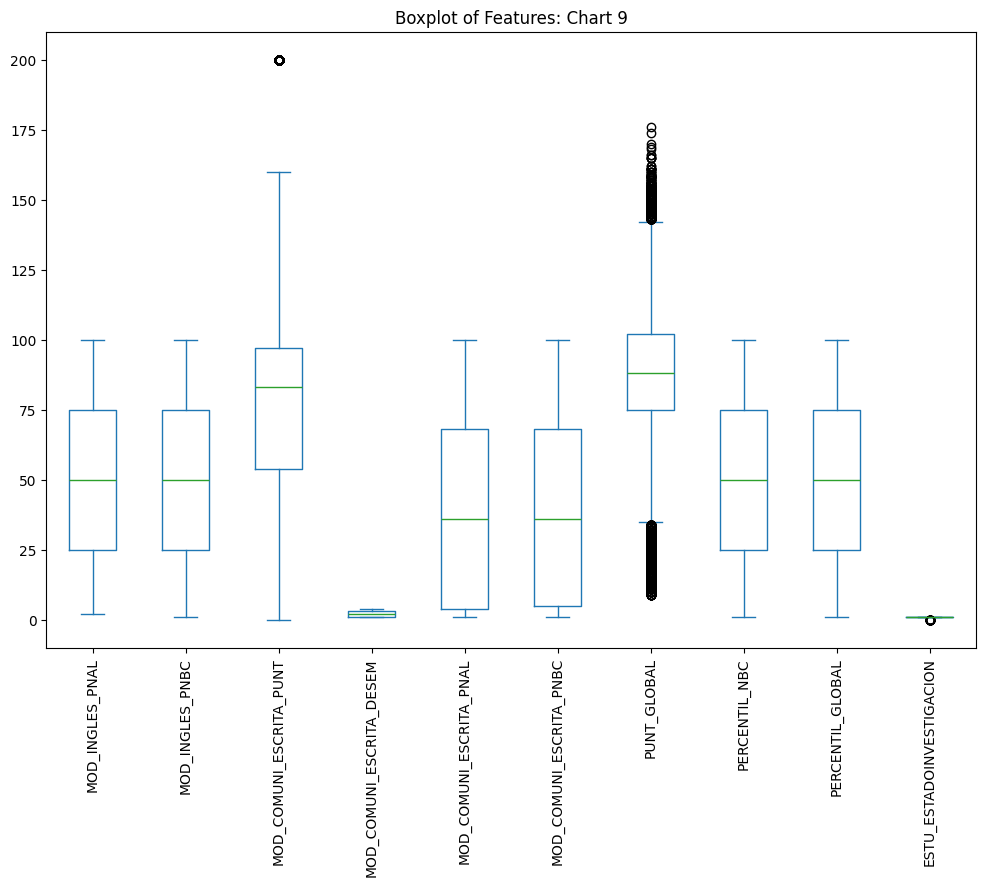

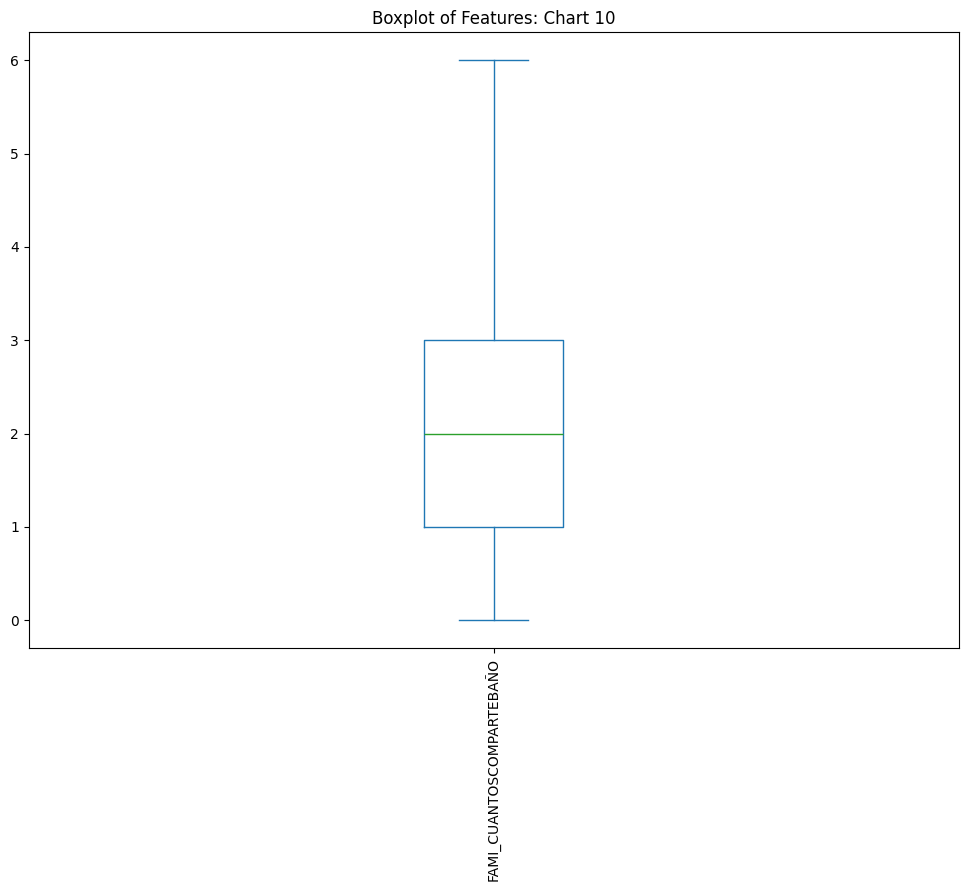

In [36]:
# Supongamos que 'df' es tu DataFrame original después de la limpieza
#df_clean = selected_df
df_clean = clean_data

# Crear una instancia de la clase de visualización
visualizer = DataVisualization()

# Mostrar descripción de los datos
print(visualizer.describe_data(df_clean))

# Visualizar gráficos de barras para características categóricas
visualizer.visualize_data(df_clean, kind='barplot')

# Visualizar boxplots para características numéricas
visualizer.visualize_data(df_clean, kind='boxplot')

# Visualizar la correlación entre variables numéricas
#visualizer.visualize_correlation(df_clean)

# Visualizar la distribución de una característica numérica en particular
#visualizer.plot_distribution(df_clean, 'PUNT_GLOBAL')
